# Report of Assignment 3
The required libraries are:


*   numpy
*   matplotlib.pyplot
*   datetime
*   packaging
*   tensorflow

Furkan Oz

foz@okstate.edu

Note: Order of code blocks matches with the report's paragraph order.

# Question 1
In this question it is asked to find optimal model for MINST dataset with 10 convolutional layer. Firstly, it is asked to use 3 different number of filter increament/decreanment method. The first one is increasing, the second one is decreasing, and the last one is first increase than decreasing. It is also asked to find the hyperparameters, such as learning rate, batch size, and optimizer selection. Since there are many combinations of these parameters and models, the strategy used will be like this:

1) The best of filter increament method will be selected.
2) With the best filter increament method, best learning rate will be selected.
3) With the best filter increament method and learning rate, best batch size will be selected.
4) With the best filter increament method, learning rate, and batch size, best optimizer will be selected.

To achieve all these and compare the models, accuracy on test data will be compared. To compare under constant conditions, default parameters will be used. Unless otherwise is stated, the default parameters are:

*   Learning rate is 0.001.
*   Optimizer is Adam.
*   Batch size is 512.
*   Epoch size is 20.

It has to be noted that the results may change with random initialization. However, the results presented in here is obtained during the final runs. According to results, decreasing number of filters ended up with the highest accuracy (0.9905) on the test cases. The hour-glass type was also close (0.9901) to decreasing number of elements but it was slightly lower. The least performance is obtained in increasing type of model (accuracy 0.9668). In theory, increasing number of filters should be the highest accuracy because we extract the fundamental features from the data and than with the extracted features we can build complex relations. However, the performance of this method was the lowest. It may be because of the low number of epocs. The performance of increasing type of model may increase more than the rest with increasing epocs. Additionally, it has to be noted that the values are so close to each other. Having an accuracy close to 0.97 is quite acceptable. 

In the second part, decreasing number of filters model is used with 3 different learning rate which are 0.01, 0.001, and 0.0001. The 0.001 was default value so in the first part it is solved and accuracy was (0.9905). The lower learning rate led to significantly low accuracy (0.1135). It is because higher learning rates may easily skip the minimum or it may not be able to reach to minimum becuase of high change in values. The low learning rate also showed similar performance (accuracy 0.9623) to learning rate 0.001. It can even reach higher accuracy according to MSE plot. However, beceause of the constant epocs numbers, higher epocs are not considered for fair comparison. 

In the third part, decreasing number of filters model with 0.001 learning rate is used with 3 different batch size which are 256, 512, 1024. The 512 one was the default one and its accuracy was (0.9905). According to the results, increasing batch size led to poor results. The best performance is taken at 256 batch size which is (0.9908). The worst performance is taken at 1024 batch size which is (0.9875). It is known that the increasing batch size leads to worse results. However, it is not known the reason (Reference: "https://medium.com/mini-distill/effect-of-batch-size-on-training-dynamics-21c14f7a716e", the exact sentence: "However, it is well known that too large of a batch size will lead to poor generalization (although currently it’s not known why this is so)." ). My guess is that we divide the data into pieces which may affects some coralation among data points.

The last part, decreasing number of filters model with 0.001 learning rate and 256 batch size is used with 3 different optimizers. The Adam optimizer is used in the previous step and the accuracy was (0.9905). The RMSProp optimizer led to very close accuracy (0.9904) to Adam optimizer. However, SGD performed very poor with the current setup (accuracy 0.1134). 

According to all the tests, Adam optimizer with 0.001 learning rate and 256 batch size led to a great accuracy with 20 epocs. The filter increament/decreament model is selected as decreasing number of filters. Since it is asked to compare the results with best hyperparameters, all 3 models (decreasing model, increasing model, hour-glass model) will be run with the optimized parameters. The decreasing model is already run with these conditions and the accuracy was (0.9905). The increasing model led to an accuracy of (0.9843). The hour-glass model gave an accuracy of 0.9865 which is lower than the default conditions. However, it has to be noted that there is random initialization and the results are already so close to each other. Again the best performance is obtained by decreasing model.

In [42]:
################################################################################
################################################################################
##### CS 5783 - Machine Learning                                           #####
##### Assignment - 3                                                       #####
##### Question - 1                                                         #####
#####                                                                      #####
##### 10/20/2022                                                           #####
#####                                                                      #####
##### Furkan Oz                                                            #####
##### foz@okstate.edu                                                      #####
################################################################################
################################################################################
from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

import tensorboard
import matplotlib.pyplot as plt

import numpy as np

In [3]:
# Load Data
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
train_images = train_images / 255.0

11490434/11490434 [==============================] - 0s 0us/step


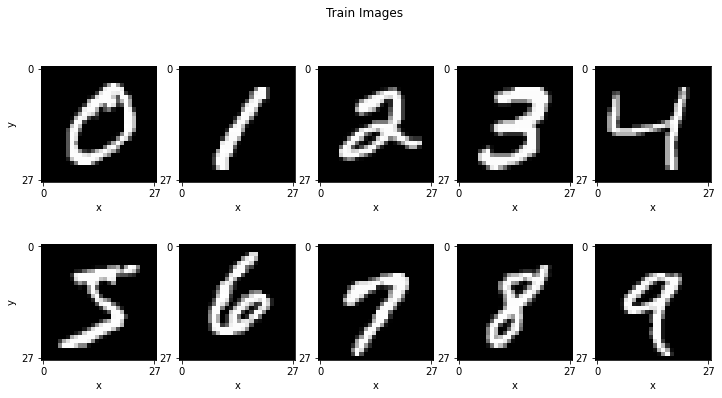

In [4]:
# Plotting
fig, ax = plt.subplots(2,5,figsize = (12, 6))
fig.suptitle('Train Images')
ax = ax.flatten()
for i in range(10):
    im_idx = np.argwhere(train_labels == i)[0]
    ax[i].set(xlabel='x', ylabel='y')
    plt.setp(ax, xticks=[0, 27], yticks=[0, 27])
    plottable_image = np.reshape(train_images[im_idx], (28, 28))
    ax[i].imshow(plottable_image, cmap='gray')

In [5]:
x_train = train_images.reshape(-1, 28, 28, 1) #add an additional dimension to represent the single-channel
x_test = test_images.reshape(-1, 28, 28, 1)

In [7]:
cnn_model_increasing = tf.keras.models.Sequential()
cnn_model_increasing.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
cnn_model_increasing.add(tf.keras.layers.Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_increasing.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_increasing.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn_model_increasing.add(tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_increasing.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_increasing.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model_increasing.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_increasing.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_increasing.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model_increasing.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_increasing.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_increasing.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model_increasing.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_increasing.add(tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))

cnn_model_increasing.add(tf.keras.layers.Flatten())
cnn_model_increasing.add(tf.keras.layers.Dense(512))
cnn_model_increasing.add(tf.keras.layers.Activation('relu'))
cnn_model_increasing.add(tf.keras.layers.Dense(10))
cnn_model_increasing.add(tf.keras.layers.Activation('softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
cnn_model_increasing.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
cnn_model_increasing.build(input_shape=(1,28,28,1))
cnn_model_increasing.summary()

# Train the model.
history_cnn_model_increasing = cnn_model_increasing.fit(
                                                        x_train,
                                                        train_labels, 
                                                        batch_size=512,
                                                        epochs=20)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (1, 28, 28, 16)           160       
                                                                 
 conv2d_11 (Conv2D)          (1, 14, 14, 16)           2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (1, 7, 7, 16)            0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (1, 7, 7, 32)             4640      
                                                                 
 conv2d_13 (Conv2D)          (1, 4, 4, 32)             9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (1, 2, 2, 32)            0         
 2D)                                                  

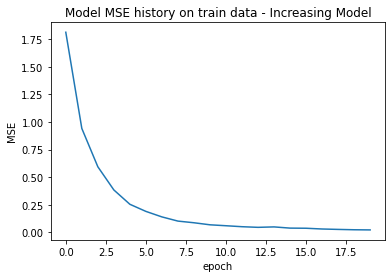

313/313 [==============================] - 1s 4ms/step - loss: 22.3711 - accuracy: 0.9668
Test Data loss: 22.37113380432129
Test Data accuracy: 0.9667999744415283


In [13]:
# Plotting
plt.plot(history_cnn_model_increasing.history['loss'])
plt.title('Model MSE history on train data - Increasing Model')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.show()

# Evaluate
score = cnn_model_increasing.evaluate(x_test, test_labels)
print('Test Data loss:', score[0])
print('Test Data accuracy:', score[1])

In [22]:
cnn_model_decreasing = tf.keras.models.Sequential()
cnn_model_decreasing.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing.add(tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing.add(tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing.add(tf.keras.layers.Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))

cnn_model_decreasing.add(tf.keras.layers.Flatten())
cnn_model_decreasing.add(tf.keras.layers.Dense(512))
cnn_model_decreasing.add(tf.keras.layers.Activation('relu'))
cnn_model_decreasing.add(tf.keras.layers.Dense(10))
cnn_model_decreasing.add(tf.keras.layers.Activation('softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
cnn_model_decreasing.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
cnn_model_decreasing.build(input_shape=(1,28,28,1))
cnn_model_decreasing.summary()

# Train the model.
history_cnn_model_decreasing = cnn_model_decreasing.fit(
    x_train,
    train_labels, 
    batch_size=512,
    epochs=20)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (1, 28, 28, 256)          2560      
                                                                 
 conv2d_71 (Conv2D)          (1, 14, 14, 256)          590080    
                                                                 
 max_pooling2d_35 (MaxPoolin  (1, 7, 7, 256)           0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (1, 7, 7, 128)            295040    
                                                                 
 conv2d_73 (Conv2D)          (1, 4, 4, 128)            147584    
                                                                 
 max_pooling2d_36 (MaxPoolin  (1, 2, 2, 128)           0         
 g2D)                                                 

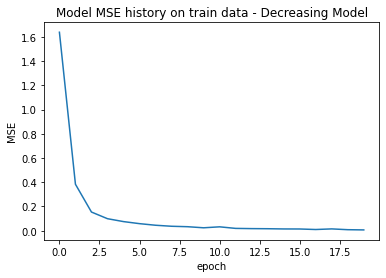

313/313 [==============================] - 2s 5ms/step - loss: 7.8513 - accuracy: 0.9905
Test Data loss: 7.851250648498535
Test Data accuracy: 0.9904999732971191


In [23]:
# Plotting
plt.plot(history_cnn_model_decreasing.history['loss'])
plt.title('Model MSE history on train data - Decreasing Model')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.show()

# Evaluate
score = cnn_model_decreasing.evaluate(x_test, test_labels)
print('Test Data loss:', score[0])
print('Test Data accuracy:', score[1])

In [31]:
cnn_model_glass = tf.keras.models.Sequential()
cnn_model_glass.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model_glass.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_glass.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_glass.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model_glass.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_glass.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_glass.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model_glass.add(tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_glass.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_glass.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model_glass.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_glass.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_glass.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model_glass.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_glass.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))

cnn_model_glass.add(tf.keras.layers.Flatten())
cnn_model_glass.add(tf.keras.layers.Dense(512))
cnn_model_glass.add(tf.keras.layers.Activation('relu'))
cnn_model_glass.add(tf.keras.layers.Dense(10))
cnn_model_glass.add(tf.keras.layers.Activation('softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
cnn_model_glass.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
cnn_model_glass.build(input_shape=(1,28,28,1))
cnn_model_glass.summary()

# Train the model.
history_cnn_model_glass = cnn_model_glass.fit(
    x_train,
    train_labels, 
    batch_size=512,
    epochs=20)



Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_120 (Conv2D)         (1, 28, 28, 64)           640       
                                                                 
 conv2d_121 (Conv2D)         (1, 14, 14, 64)           36928     
                                                                 
 max_pooling2d_60 (MaxPoolin  (1, 7, 7, 64)            0         
 g2D)                                                            
                                                                 
 conv2d_122 (Conv2D)         (1, 7, 7, 128)            73856     
                                                                 
 conv2d_123 (Conv2D)         (1, 4, 4, 128)            147584    
                                                                 
 max_pooling2d_61 (MaxPoolin  (1, 2, 2, 128)           0         
 g2D)                                                

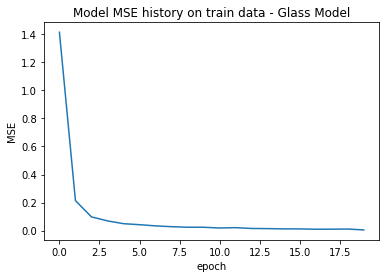

313/313 [==============================] - 1s 4ms/step - loss: 9.2376 - accuracy: 0.9901
Test Data loss: 9.237592697143555
Test Data accuracy: 0.9901000261306763


In [32]:
# Plotting
plt.plot(history_cnn_model_glass.history['loss'])
plt.title('Model MSE history on train data - Glass Model')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.show()

# Evaluate
score = cnn_model_glass.evaluate(x_test, test_labels)
print('Test Data loss:', score[0])
print('Test Data accuracy:', score[1])

In [6]:
cnn_model_decreasing_lr_0_01 = tf.keras.models.Sequential()
cnn_model_decreasing_lr_0_01.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_lr_0_01.add(tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing_lr_0_01.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_lr_0_01.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_lr_0_01.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing_lr_0_01.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_lr_0_01.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_lr_0_01.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing_lr_0_01.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_lr_0_01.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_lr_0_01.add(tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing_lr_0_01.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_lr_0_01.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_lr_0_01.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_lr_0_01.add(tf.keras.layers.Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))

cnn_model_decreasing_lr_0_01.add(tf.keras.layers.Flatten())
cnn_model_decreasing_lr_0_01.add(tf.keras.layers.Dense(512))
cnn_model_decreasing_lr_0_01.add(tf.keras.layers.Activation('relu'))
cnn_model_decreasing_lr_0_01.add(tf.keras.layers.Dense(10))
cnn_model_decreasing_lr_0_01.add(tf.keras.layers.Activation('softmax'))

opt = keras.optimizers.Adam(learning_rate=0.01)
cnn_model_decreasing_lr_0_01.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
cnn_model_decreasing_lr_0_01.build(input_shape=(1,28,28,1))
cnn_model_decreasing_lr_0_01.summary()

# Train the model.
history_cnn_model_decreasing_lr_0_01 = cnn_model_decreasing_lr_0_01.fit(
    x_train,
    train_labels, 
    batch_size=512,
    epochs=20)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (1, 28, 28, 256)          2560      
                                                                 
 conv2d_1 (Conv2D)           (1, 14, 14, 256)          590080    
                                                                 
 max_pooling2d (MaxPooling2D  (1, 7, 7, 256)           0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (1, 7, 7, 128)            295040    
                                                                 
 conv2d_3 (Conv2D)           (1, 4, 4, 128)            147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (1, 2, 2, 128)           0         
 2D)                                                    

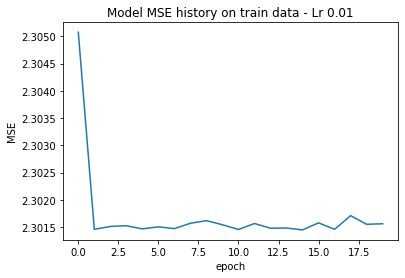

313/313 [==============================] - 2s 5ms/step - loss: 2.3016 - accuracy: 0.1135
Test Data loss: 2.301597833633423
Test Data accuracy: 0.11349999904632568


In [12]:
# Plotting
plt.plot(history_cnn_model_decreasing_lr_0_01.history['loss'])
plt.title('Model MSE history on train data - Lr 0.01')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.show()

# Evaluate
score = cnn_model_decreasing_lr_0_01.evaluate(x_test, test_labels)
print('Test Data loss:', score[0])
print('Test Data accuracy:', score[1])

In [13]:
cnn_model_decreasing_lr_0_0001 = tf.keras.models.Sequential()
cnn_model_decreasing_lr_0_0001.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_lr_0_0001.add(tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing_lr_0_0001.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_lr_0_0001.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_lr_0_0001.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing_lr_0_0001.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_lr_0_0001.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_lr_0_0001.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing_lr_0_0001.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_lr_0_0001.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_lr_0_0001.add(tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing_lr_0_0001.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_lr_0_0001.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_lr_0_0001.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_lr_0_0001.add(tf.keras.layers.Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))

cnn_model_decreasing_lr_0_0001.add(tf.keras.layers.Flatten())
cnn_model_decreasing_lr_0_0001.add(tf.keras.layers.Dense(512))
cnn_model_decreasing_lr_0_0001.add(tf.keras.layers.Activation('relu'))
cnn_model_decreasing_lr_0_0001.add(tf.keras.layers.Dense(10))
cnn_model_decreasing_lr_0_0001.add(tf.keras.layers.Activation('softmax'))

opt = keras.optimizers.Adam(learning_rate=0.0001)
cnn_model_decreasing_lr_0_0001.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
cnn_model_decreasing_lr_0_0001.build(input_shape=(1,28,28,1))
cnn_model_decreasing_lr_0_0001.summary()

# Train the model.
history_cnn_model_decreasing_lr_0_0001 = cnn_model_decreasing_lr_0_0001.fit(
    x_train,
    train_labels, 
    batch_size=512,
    epochs=20)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (1, 28, 28, 256)          2560      
                                                                 
 conv2d_31 (Conv2D)          (1, 14, 14, 256)          590080    
                                                                 
 max_pooling2d_15 (MaxPoolin  (1, 7, 7, 256)           0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (1, 7, 7, 128)            295040    
                                                                 
 conv2d_33 (Conv2D)          (1, 4, 4, 128)            147584    
                                                                 
 max_pooling2d_16 (MaxPoolin  (1, 2, 2, 128)           0         
 g2D)                                                 

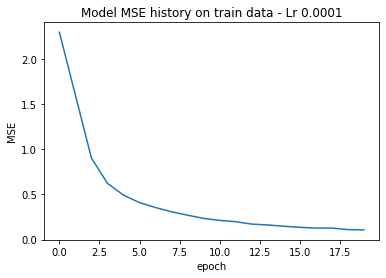

313/313 [==============================] - 2s 6ms/step - loss: 20.2689 - accuracy: 0.9623
Test Data loss: 20.268939971923828
Test Data accuracy: 0.9623000025749207


In [14]:
# Plotting
plt.plot(history_cnn_model_decreasing_lr_0_0001.history['loss'])
plt.title('Model MSE history on train data - Lr 0.0001')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.show()

# Evaluate
score = cnn_model_decreasing_lr_0_0001.evaluate(x_test, test_labels)
print('Test Data loss:', score[0])
print('Test Data accuracy:', score[1])

In [15]:
cnn_model_decreasing_batch_256 = tf.keras.models.Sequential()
cnn_model_decreasing_batch_256.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_batch_256.add(tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing_batch_256.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_batch_256.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_batch_256.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing_batch_256.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_batch_256.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_batch_256.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing_batch_256.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_batch_256.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_batch_256.add(tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing_batch_256.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_batch_256.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_batch_256.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_batch_256.add(tf.keras.layers.Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))

cnn_model_decreasing_batch_256.add(tf.keras.layers.Flatten())
cnn_model_decreasing_batch_256.add(tf.keras.layers.Dense(512))
cnn_model_decreasing_batch_256.add(tf.keras.layers.Activation('relu'))
cnn_model_decreasing_batch_256.add(tf.keras.layers.Dense(10))
cnn_model_decreasing_batch_256.add(tf.keras.layers.Activation('softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
cnn_model_decreasing_batch_256.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
cnn_model_decreasing_batch_256.build(input_shape=(1,28,28,1))
cnn_model_decreasing_batch_256.summary()

# Train the model.
history_cnn_model_decreasing_batch_256 = cnn_model_decreasing_batch_256.fit(
    x_train,
    train_labels, 
    batch_size=256,
    epochs=20)



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (1, 28, 28, 256)          2560      
                                                                 
 conv2d_41 (Conv2D)          (1, 14, 14, 256)          590080    
                                                                 
 max_pooling2d_20 (MaxPoolin  (1, 7, 7, 256)           0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (1, 7, 7, 128)            295040    
                                                                 
 conv2d_43 (Conv2D)          (1, 4, 4, 128)            147584    
                                                                 
 max_pooling2d_21 (MaxPoolin  (1, 2, 2, 128)           0         
 g2D)                                                 

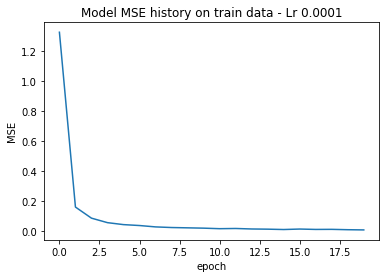

313/313 [==============================] - 2s 5ms/step - loss: 7.8723 - accuracy: 0.9909
Test loss: 7.872331142425537
Test accuracy: 0.9908999800682068


In [16]:
# Plotting
plt.plot(history_cnn_model_decreasing_batch_256.history['loss'])
plt.title('Model MSE history on train data - Lr 0.0001')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.show()

# Evaluate
score = cnn_model_decreasing_batch_256.evaluate(x_test, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [17]:
cnn_model_decreasing_batch_1024 = tf.keras.models.Sequential()
cnn_model_decreasing_batch_1024.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_batch_1024.add(tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing_batch_1024.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_batch_1024.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_batch_1024.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing_batch_1024.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_batch_1024.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_batch_1024.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing_batch_1024.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_batch_1024.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_batch_1024.add(tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing_batch_1024.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_batch_1024.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_batch_1024.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_batch_1024.add(tf.keras.layers.Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))

cnn_model_decreasing_batch_1024.add(tf.keras.layers.Flatten())
cnn_model_decreasing_batch_1024.add(tf.keras.layers.Dense(512))
cnn_model_decreasing_batch_1024.add(tf.keras.layers.Activation('relu'))
cnn_model_decreasing_batch_1024.add(tf.keras.layers.Dense(10))
cnn_model_decreasing_batch_1024.add(tf.keras.layers.Activation('softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
cnn_model_decreasing_batch_1024.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
cnn_model_decreasing_batch_1024.build(input_shape=(1,28,28,1))
cnn_model_decreasing_batch_1024.summary()

# Train the model.
history_cnn_model_decreasing_batch_1024 = cnn_model_decreasing_batch_1024.fit(
    x_train,
    train_labels, 
    batch_size=1024,
    epochs=20)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (1, 28, 28, 256)          2560      
                                                                 
 conv2d_51 (Conv2D)          (1, 14, 14, 256)          590080    
                                                                 
 max_pooling2d_25 (MaxPoolin  (1, 7, 7, 256)           0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (1, 7, 7, 128)            295040    
                                                                 
 conv2d_53 (Conv2D)          (1, 4, 4, 128)            147584    
                                                                 
 max_pooling2d_26 (MaxPoolin  (1, 2, 2, 128)           0         
 g2D)                                                 

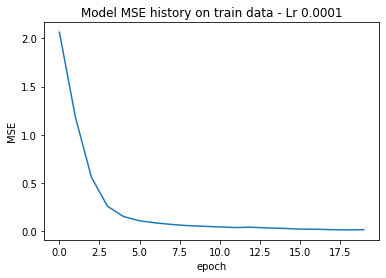

313/313 [==============================] - 2s 5ms/step - loss: 8.8603 - accuracy: 0.9875
Test loss: 8.860332489013672
Test accuracy: 0.987500011920929


In [18]:
# Plotting
plt.plot(history_cnn_model_decreasing_batch_1024.history['loss'])
plt.title('Model MSE history on train data - Lr 0.0001')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.show()

# Evaluate
score = cnn_model_decreasing_batch_1024.evaluate(x_test, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [8]:
cnn_model_decreasing_SGD = tf.keras.models.Sequential()
cnn_model_decreasing_SGD.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_SGD.add(tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing_SGD.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_SGD.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_SGD.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing_SGD.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_SGD.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_SGD.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing_SGD.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_SGD.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_SGD.add(tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing_SGD.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_SGD.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_SGD.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_SGD.add(tf.keras.layers.Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))

cnn_model_decreasing_SGD.add(tf.keras.layers.Flatten())
cnn_model_decreasing_SGD.add(tf.keras.layers.Dense(512))
cnn_model_decreasing_SGD.add(tf.keras.layers.Activation('relu'))
cnn_model_decreasing_SGD.add(tf.keras.layers.Dense(10))
cnn_model_decreasing_SGD.add(tf.keras.layers.Activation('softmax'))

opt = keras.optimizers.SGD(learning_rate=0.001)
cnn_model_decreasing_SGD.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
cnn_model_decreasing_SGD.build(input_shape=(1,28,28,1))
cnn_model_decreasing_SGD.summary()

# Train the model.
history_cnn_model_decreasing_SGD = cnn_model_decreasing_SGD.fit(
    x_train,
    train_labels, 
    batch_size=256,
    epochs=20)



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (1, 28, 28, 256)          2560      
                                                                 
 conv2d_11 (Conv2D)          (1, 14, 14, 256)          590080    
                                                                 
 max_pooling2d_5 (MaxPooling  (1, 7, 7, 256)           0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (1, 7, 7, 128)            295040    
                                                                 
 conv2d_13 (Conv2D)          (1, 4, 4, 128)            147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (1, 2, 2, 128)           0         
 2D)                                                  

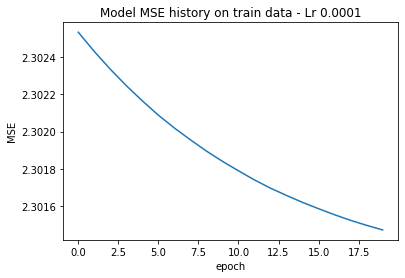

313/313 [==============================] - 2s 6ms/step - loss: 2.3014 - accuracy: 0.1135
Test loss: 2.301352024078369
Test accuracy: 0.11349999904632568


In [9]:
# Plotting
plt.plot(history_cnn_model_decreasing_SGD.history['loss'])
plt.title('Model MSE history on train data - Lr 0.0001')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.show()

# Evaluate
score = cnn_model_decreasing_SGD.evaluate(x_test, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [10]:
cnn_model_decreasing_RMS = tf.keras.models.Sequential()
cnn_model_decreasing_RMS.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_RMS.add(tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing_RMS.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_RMS.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_RMS.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing_RMS.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_RMS.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_RMS.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing_RMS.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_RMS.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_RMS.add(tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_decreasing_RMS.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_RMS.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
cnn_model_decreasing_RMS.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_decreasing_RMS.add(tf.keras.layers.Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))

cnn_model_decreasing_RMS.add(tf.keras.layers.Flatten())
cnn_model_decreasing_RMS.add(tf.keras.layers.Dense(512))
cnn_model_decreasing_RMS.add(tf.keras.layers.Activation('relu'))
cnn_model_decreasing_RMS.add(tf.keras.layers.Dense(10))
cnn_model_decreasing_RMS.add(tf.keras.layers.Activation('softmax'))

opt = keras.optimizers.RMSprop(learning_rate=0.001)
cnn_model_decreasing_RMS.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
cnn_model_decreasing_RMS.build(input_shape=(1,28,28,1))
cnn_model_decreasing_RMS.summary()

# Train the model.
history_cnn_model_decreasing_RMS = cnn_model_decreasing_RMS.fit(
    x_train,
    train_labels, 
    batch_size=256,
    epochs=20)



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (1, 28, 28, 256)          2560      
                                                                 
 conv2d_21 (Conv2D)          (1, 14, 14, 256)          590080    
                                                                 
 max_pooling2d_10 (MaxPoolin  (1, 7, 7, 256)           0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (1, 7, 7, 128)            295040    
                                                                 
 conv2d_23 (Conv2D)          (1, 4, 4, 128)            147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (1, 2, 2, 128)           0         
 g2D)                                                 

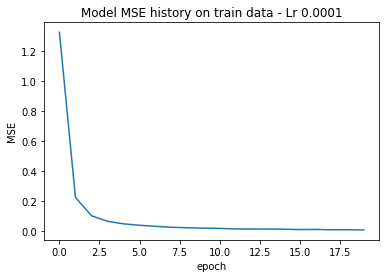

313/313 [==============================] - 2s 5ms/step - loss: 12.9549 - accuracy: 0.9904
Test loss: 12.954948425292969
Test accuracy: 0.9904000163078308


In [11]:
# Plotting
plt.plot(history_cnn_model_decreasing_RMS.history['loss'])
plt.title('Model MSE history on train data - Lr 0.0001')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.show()

# Evaluate
score = cnn_model_decreasing_RMS.evaluate(x_test, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [35]:
cnn_model_increasing_best = tf.keras.models.Sequential()
cnn_model_increasing_best.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
cnn_model_increasing_best.add(tf.keras.layers.Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_increasing_best.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_increasing_best.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn_model_increasing_best.add(tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_increasing_best.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_increasing_best.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model_increasing_best.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_increasing_best.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_increasing_best.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model_increasing_best.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_increasing_best.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_increasing_best.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model_increasing_best.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_increasing_best.add(tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))

cnn_model_increasing_best.add(tf.keras.layers.Flatten())
cnn_model_increasing_best.add(tf.keras.layers.Dense(512))
cnn_model_increasing_best.add(tf.keras.layers.Activation('relu'))
cnn_model_increasing_best.add(tf.keras.layers.Dense(10))
cnn_model_increasing_best.add(tf.keras.layers.Activation('softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
cnn_model_increasing_best.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
cnn_model_increasing_best.build(input_shape=(1,28,28,1))
cnn_model_increasing_best.summary()

# Train the model.
history_cnn_model_increasing_best = cnn_model_increasing_best.fit(
                                                        x_train,
                                                        train_labels, 
                                                        batch_size=256,
                                                        epochs=20)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_140 (Conv2D)         (1, 28, 28, 16)           160       
                                                                 
 conv2d_141 (Conv2D)         (1, 14, 14, 16)           2320      
                                                                 
 max_pooling2d_70 (MaxPoolin  (1, 7, 7, 16)            0         
 g2D)                                                            
                                                                 
 conv2d_142 (Conv2D)         (1, 7, 7, 32)             4640      
                                                                 
 conv2d_143 (Conv2D)         (1, 4, 4, 32)             9248      
                                                                 
 max_pooling2d_71 (MaxPoolin  (1, 2, 2, 32)            0         
 g2D)                                                

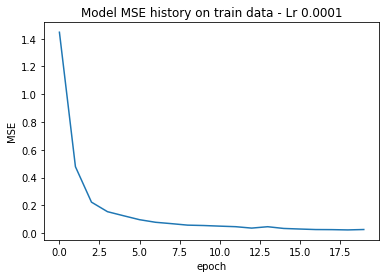

313/313 [==============================] - 1s 4ms/step - loss: 9.0470 - accuracy: 0.9843
Test loss: 9.047045707702637
Test accuracy: 0.9843000173568726


In [36]:
# Plotting
plt.plot(history_cnn_model_increasing_best.history['loss'])
plt.title('Model MSE history on train data - Lr 0.0001')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.show()

# Evaluate
score = cnn_model_increasing_best.evaluate(x_test, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [37]:
cnn_model_glass_best = tf.keras.models.Sequential()
cnn_model_glass_best.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model_glass_best.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_glass_best.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_glass_best.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model_glass_best.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_glass_best.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_glass_best.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model_glass_best.add(tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_glass_best.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_glass_best.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model_glass_best.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_glass_best.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_glass_best.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model_glass_best.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_glass_best.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))

cnn_model_glass_best.add(tf.keras.layers.Flatten())
cnn_model_glass_best.add(tf.keras.layers.Dense(512))
cnn_model_glass_best.add(tf.keras.layers.Activation('relu'))
cnn_model_glass_best.add(tf.keras.layers.Dense(10))
cnn_model_glass_best.add(tf.keras.layers.Activation('softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
cnn_model_glass_best.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
cnn_model_glass_best.build(input_shape=(1,28,28,1))
cnn_model_glass_best.summary()

# Train the model.
history_cnn_model_glass_best = cnn_model_glass_best.fit(
    x_train,
    train_labels, 
    batch_size=256,
    epochs=20)



Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_150 (Conv2D)         (1, 28, 28, 64)           640       
                                                                 
 conv2d_151 (Conv2D)         (1, 14, 14, 64)           36928     
                                                                 
 max_pooling2d_75 (MaxPoolin  (1, 7, 7, 64)            0         
 g2D)                                                            
                                                                 
 conv2d_152 (Conv2D)         (1, 7, 7, 128)            73856     
                                                                 
 conv2d_153 (Conv2D)         (1, 4, 4, 128)            147584    
                                                                 
 max_pooling2d_76 (MaxPoolin  (1, 2, 2, 128)           0         
 g2D)                                                

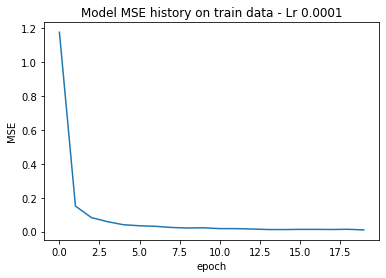

313/313 [==============================] - 2s 5ms/step - loss: 18.4385 - accuracy: 0.9866
Test loss: 18.43846321105957
Test accuracy: 0.9865999817848206


In [38]:
# Plotting
plt.plot(history_cnn_model_glass_best.history['loss'])
plt.title('Model MSE history on train data - Lr 0.0001')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.show()

# Evaluate
score = cnn_model_glass_best.evaluate(x_test, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Question 2

In this question, it is asked to implement LeNet network for CIFAR-10 dataset with 25 epocs. After that it is asked to find the effect of the learning rate.

\\
Firstly, learning rate is decided as 0.01, 0.001, and 0.0001. The LeNet model is run with these learning rates. The accuracy on test sets are 0.0997, 0.5647, and 0.3244, respectively. These values are obtained at constant epocs which is 25. It is seen that the best performance is obtained with 0.001. Lower learning rates are tend to approach lower loss values but there may be 2 different reason learning rate 0.001 accuracy is higher than learning rate 0.0001. The first reason might be random initialization may lead to different local minima which is higher than the other one. The second reason might be overfitting. However, overfitting is not the case in here as the accuracy on training set with low learning rate is already low.


\\
In the second part, it is asked to use different batch sizes. For this, learning rate is taken as 0.001. The batch sizes are defined as 256, 512, and 1024. The corresponding accuracies are 0.5647, 0.5177, and 0.5546, respectively. As the batch size decreases the accuracy needs to increase as explained in the previous question. The best is obtained with 256 batch size. 1024 batch size also gave close results to 256 batch size but again because of the random weights, it is hard to understand the trend.



\\
In the third part, it is asked to find the best model. In this model, adam optimizer is used with 256 batch size and 0.001 learning rate. Epocs are limitted to 30 and the obtained accuracy is 0.5720. Many different combinations are tried but nothing could achieve more than 0.60. For better accuracy, model can be replaced with different amount of neurons and layers.

\\
In the last part, it is asked to implement feed forward network with same number of nuerons with LeNet network. Feed forward network performance is so poor when it is compared with LeNet. Lenet network with best hyperparameters and 25 epocs got 0.5199 and under same conditions feed forward network got 0.1583. The number of parameters that LeNet has is ~700,000 and number of parameters that feed forward network has is ~30,000. It means LeNet has more than 10 times more parameters. This is huge. However, the accuracy increase is more than 3 which is quite acceptable. Thus, it makes sense to use LeNet over feed forward network especially for this data, training and solution times are in the order of minutes for LeNet so everything is managable.

In [43]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
assert train_images.shape == (50000, 32, 32, 3)
assert test_images.shape == (10000, 32, 32, 3)
assert train_labels.shape == (50000, 1)
assert test_labels.shape == (10000, 1)
train_images = train_images / 255.0
x_train = train_images.reshape(-1, 32, 32, 3, 1)
x_test = test_images.reshape(-1, 32, 32, 3, 1)

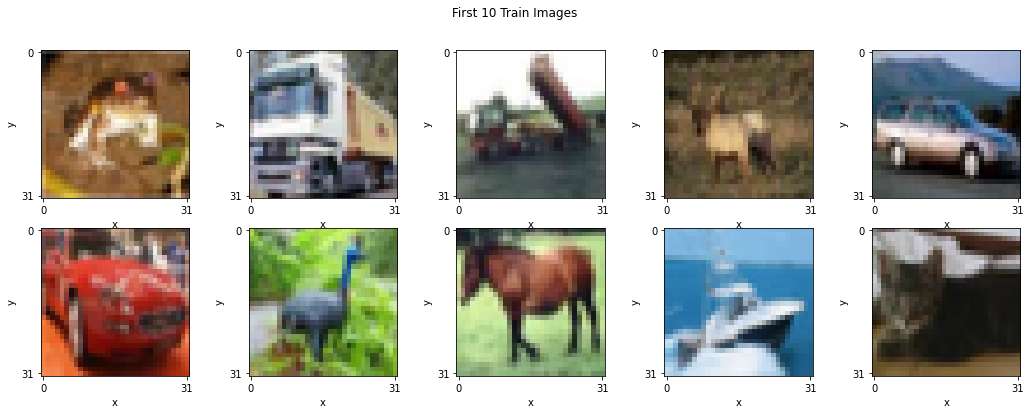

In [44]:
# Plotting
fig, ax = plt.subplots(2,5,figsize = (18, 6))
fig.suptitle('First 10 Train Images')
ax = ax.flatten()
for i in range(10):
    im_idx = np.argwhere(train_labels == i)[0]
    ax[i].set(xlabel='x', ylabel='y')
    plt.setp(ax, xticks=[0, 31], yticks=[0, 31])
    plottable_image = np.reshape(train_images[i,:,:,:], (32, 32,3))
    ax[i].imshow(plottable_image, cmap='gray')

In [70]:
lenet = tf.keras.models.Sequential()
lenet.add(tf.keras.layers.Conv2D(6, (5, 5), strides=(1, 1), padding='same', activation='relu'))
lenet.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
lenet.add(tf.keras.layers.Conv2D(16, (5, 5), strides=(1, 1), padding='same', activation='relu'))
lenet.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
lenet.add(tf.keras.layers.Conv2D(120, (5, 5), strides=(1, 1), padding='same', activation='relu'))

lenet.add(tf.keras.layers.Flatten())
lenet.add(tf.keras.layers.Dense(84))
lenet.add(tf.keras.layers.Activation('relu'))
lenet.add(tf.keras.layers.Dense(10))
lenet.add(tf.keras.layers.Activation('softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
lenet.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
lenet.build(input_shape=(1,32,32,3))
lenet.summary()

# Train the model.
history_lenet = lenet.fit(
    train_images,
    train_labels, 
    batch_size=256,
    epochs=25)



Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_193 (Conv2D)         (1, 32, 32, 6)            456       
                                                                 
 max_pooling2d_102 (MaxPooli  (1, 16, 16, 6)           0         
 ng2D)                                                           
                                                                 
 conv2d_194 (Conv2D)         (1, 16, 16, 16)           2416      
                                                                 
 max_pooling2d_103 (MaxPooli  (1, 8, 8, 16)            0         
 ng2D)                                                           
                                                                 
 conv2d_195 (Conv2D)         (1, 8, 8, 120)            48120     
                                                                 
 flatten_28 (Flatten)        (1, 7680)               

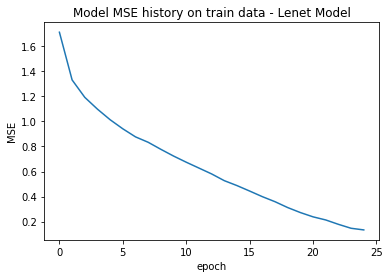

313/313 [==============================] - 1s 3ms/step - loss: 560.0629 - accuracy: 0.5647
Test loss: 560.0629272460938
Test accuracy: 0.5647000074386597


In [71]:
# Plotting
plt.plot(history_lenet.history['loss'])
plt.title('Model MSE history on train data - Lenet Model')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.show()

# Evaluate
score = lenet.evaluate(test_images, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [48]:
lenet_lr_0_01 = tf.keras.models.Sequential()
lenet_lr_0_01.add(tf.keras.layers.Conv2D(6, (5, 5), strides=(1, 1), padding='same', activation='relu'))
lenet_lr_0_01.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
lenet_lr_0_01.add(tf.keras.layers.Conv2D(16, (5, 5), strides=(1, 1), padding='same', activation='relu'))
lenet_lr_0_01.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
lenet_lr_0_01.add(tf.keras.layers.Conv2D(120, (5, 5), strides=(1, 1), padding='same', activation='relu'))

lenet_lr_0_01.add(tf.keras.layers.Flatten())
lenet_lr_0_01.add(tf.keras.layers.Dense(84))
lenet_lr_0_01.add(tf.keras.layers.Activation('relu'))
lenet_lr_0_01.add(tf.keras.layers.Dense(10))
lenet_lr_0_01.add(tf.keras.layers.Activation('softmax'))

opt = keras.optimizers.Adam(learning_rate=0.01)
lenet_lr_0_01.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
lenet_lr_0_01.build(input_shape=(1,32,32,3))
lenet_lr_0_01.summary()

# Train the model.
history_lenet_lr_0_01 = lenet_lr_0_01.fit(
    train_images,
    train_labels, 
    batch_size=256,
    epochs=25)



Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_166 (Conv2D)         (1, 32, 32, 6)            456       
                                                                 
 max_pooling2d_84 (MaxPoolin  (1, 16, 16, 6)           0         
 g2D)                                                            
                                                                 
 conv2d_167 (Conv2D)         (1, 16, 16, 16)           2416      
                                                                 
 max_pooling2d_85 (MaxPoolin  (1, 8, 8, 16)            0         
 g2D)                                                            
                                                                 
 conv2d_168 (Conv2D)         (1, 8, 8, 120)            48120     
                                                                 
 flatten_18 (Flatten)        (1, 7680)               

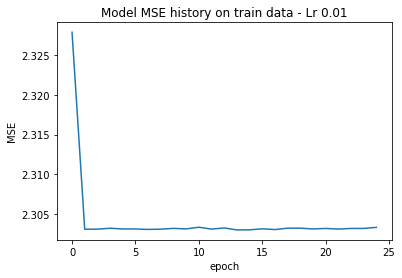

313/313 [==============================] - 1s 3ms/step - loss: 2.3071 - accuracy: 0.0997
Test loss: 2.307072639465332
Test accuracy: 0.09969999641180038


In [49]:
# Plotting
plt.plot(history_lenet_lr_0_01.history['loss'])
plt.title('Model MSE history on train data - Lr 0.01')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.show()

# Evaluate
score = lenet_lr_0_01.evaluate(test_images, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [50]:
lenet_lr_0_0001 = tf.keras.models.Sequential()
lenet_lr_0_0001.add(tf.keras.layers.Conv2D(6, (5, 5), strides=(1, 1), padding='same', activation='relu'))
lenet_lr_0_0001.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
lenet_lr_0_0001.add(tf.keras.layers.Conv2D(16, (5, 5), strides=(1, 1), padding='same', activation='relu'))
lenet_lr_0_0001.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
lenet_lr_0_0001.add(tf.keras.layers.Conv2D(120, (5, 5), strides=(1, 1), padding='same', activation='relu'))

lenet_lr_0_0001.add(tf.keras.layers.Flatten())
lenet_lr_0_0001.add(tf.keras.layers.Dense(84))
lenet_lr_0_0001.add(tf.keras.layers.Activation('relu'))
lenet_lr_0_0001.add(tf.keras.layers.Dense(10))
lenet_lr_0_0001.add(tf.keras.layers.Activation('softmax'))

opt = keras.optimizers.Adam(learning_rate=0.01)
lenet_lr_0_0001.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
lenet_lr_0_0001.build(input_shape=(1,32,32,3))
lenet_lr_0_0001.summary()

# Train the model.
history_lenet_lr_0_0001 = lenet_lr_0_0001.fit(
    train_images,
    train_labels, 
    batch_size=256,
    epochs=25)



Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_169 (Conv2D)         (1, 32, 32, 6)            456       
                                                                 
 max_pooling2d_86 (MaxPoolin  (1, 16, 16, 6)           0         
 g2D)                                                            
                                                                 
 conv2d_170 (Conv2D)         (1, 16, 16, 16)           2416      
                                                                 
 max_pooling2d_87 (MaxPoolin  (1, 8, 8, 16)            0         
 g2D)                                                            
                                                                 
 conv2d_171 (Conv2D)         (1, 8, 8, 120)            48120     
                                                                 
 flatten_19 (Flatten)        (1, 7680)               

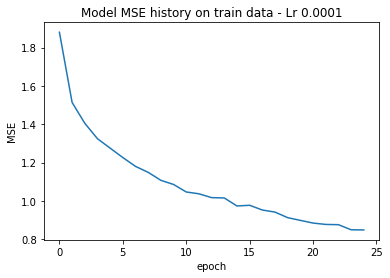

313/313 [==============================] - 1s 3ms/step - loss: 357.0632 - accuracy: 0.3244
Test loss: 357.06317138671875
Test accuracy: 0.32440000772476196


In [56]:
# Plotting
plt.plot(history_lenet_lr_0_0001.history['loss'])
plt.title('Model MSE history on train data - Lr 0.0001')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.show()

# Evaluate
score = lenet_lr_0_0001.evaluate(test_images, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [68]:
lenet_batch_512 = tf.keras.models.Sequential()
lenet_batch_512.add(tf.keras.layers.Conv2D(6, (5, 5), strides=(1, 1), padding='same', activation='relu'))
lenet_batch_512.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
lenet_batch_512.add(tf.keras.layers.Conv2D(16, (5, 5), strides=(1, 1), padding='same', activation='relu'))
lenet_batch_512.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
lenet_batch_512.add(tf.keras.layers.Conv2D(120, (5, 5), strides=(1, 1), padding='same', activation='relu'))

lenet_batch_512.add(tf.keras.layers.Flatten())
lenet_batch_512.add(tf.keras.layers.Dense(84))
lenet_batch_512.add(tf.keras.layers.Activation('relu'))
lenet_batch_512.add(tf.keras.layers.Dense(10))
lenet_batch_512.add(tf.keras.layers.Activation('softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
lenet_batch_512.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
lenet_batch_512.build(input_shape=(1,32,32,3))
lenet_batch_512.summary()

# Train the model.
history_lenet_batch_512 = lenet_batch_512.fit(
    train_images,
    train_labels, 
    batch_size=512,
    epochs=25)



Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_190 (Conv2D)         (1, 32, 32, 6)            456       
                                                                 
 max_pooling2d_100 (MaxPooli  (1, 16, 16, 6)           0         
 ng2D)                                                           
                                                                 
 conv2d_191 (Conv2D)         (1, 16, 16, 16)           2416      
                                                                 
 max_pooling2d_101 (MaxPooli  (1, 8, 8, 16)            0         
 ng2D)                                                           
                                                                 
 conv2d_192 (Conv2D)         (1, 8, 8, 120)            48120     
                                                                 
 flatten_27 (Flatten)        (1, 7680)               

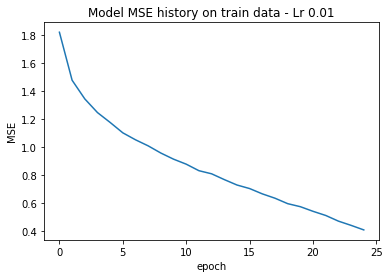

313/313 [==============================] - 1s 3ms/step - loss: 343.0621 - accuracy: 0.5177
Test loss: 343.0621032714844
Test accuracy: 0.5177000164985657


In [69]:
# Plotting
plt.plot(history_lenet_batch_512.history['loss'])
plt.title('Model MSE history on train data - Lr 0.01')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.show()

# Evaluate
score = lenet_batch_512.evaluate(test_images, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [54]:
lenet_batch_1024 = tf.keras.models.Sequential()
lenet_batch_1024.add(tf.keras.layers.Conv2D(6, (5, 5), strides=(1, 1), padding='same', activation='relu'))
lenet_batch_1024.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
lenet_batch_1024.add(tf.keras.layers.Conv2D(16, (5, 5), strides=(1, 1), padding='same', activation='relu'))
lenet_batch_1024.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
lenet_batch_1024.add(tf.keras.layers.Conv2D(120, (5, 5), strides=(1, 1), padding='same', activation='relu'))

lenet_batch_1024.add(tf.keras.layers.Flatten())
lenet_batch_1024.add(tf.keras.layers.Dense(84))
lenet_batch_1024.add(tf.keras.layers.Activation('relu'))
lenet_batch_1024.add(tf.keras.layers.Dense(10))
lenet_batch_1024.add(tf.keras.layers.Activation('softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
lenet_batch_1024.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
lenet_batch_1024.build(input_shape=(1,32,32,3))
lenet_batch_1024.summary()

# Train the model.
history_lenet_batch_1024 = lenet_batch_1024.fit(
    train_images,
    train_labels, 
    batch_size=1024,
    epochs=25)



Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_175 (Conv2D)         (1, 32, 32, 6)            456       
                                                                 
 max_pooling2d_90 (MaxPoolin  (1, 16, 16, 6)           0         
 g2D)                                                            
                                                                 
 conv2d_176 (Conv2D)         (1, 16, 16, 16)           2416      
                                                                 
 max_pooling2d_91 (MaxPoolin  (1, 8, 8, 16)            0         
 g2D)                                                            
                                                                 
 conv2d_177 (Conv2D)         (1, 8, 8, 120)            48120     
                                                                 
 flatten_21 (Flatten)        (1, 7680)               

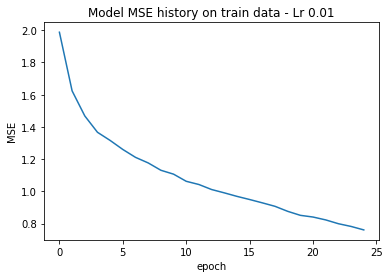

313/313 [==============================] - 2s 5ms/step - loss: 213.4722 - accuracy: 0.5546
Test loss: 213.47215270996094
Test accuracy: 0.5546000003814697


In [55]:
# Plotting
plt.plot(history_lenet_batch_1024.history['loss'])
plt.title('Model MSE history on train data - Lr 0.01')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.show()

# Evaluate
score = lenet_batch_1024.evaluate(test_images, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [90]:
lenet_best = tf.keras.models.Sequential()
lenet_best.add(tf.keras.layers.Conv2D(6, (5, 5), strides=(1, 1), padding='same', activation='relu'))
lenet_best.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
lenet_best.add(tf.keras.layers.Conv2D(16, (5, 5), strides=(1, 1), padding='same', activation='relu'))
lenet_best.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
lenet_best.add(tf.keras.layers.Conv2D(120, (5, 5), strides=(1, 1), padding='same', activation='relu'))

lenet_best.add(tf.keras.layers.Flatten())
lenet_best.add(tf.keras.layers.Dense(84))
lenet_best.add(tf.keras.layers.Activation('relu'))
lenet_best.add(tf.keras.layers.Dense(10))
lenet_best.add(tf.keras.layers.Activation('softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
lenet_best.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
lenet_best.build(input_shape=(1,32,32,3))
lenet_best.summary()

# Train the model.
history_lenet_best = lenet_best.fit(
    train_images,
    train_labels, 
    batch_size=256,
    epochs=30)


Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_217 (Conv2D)         (1, 32, 32, 6)            456       
                                                                 
 max_pooling2d_118 (MaxPooli  (1, 16, 16, 6)           0         
 ng2D)                                                           
                                                                 
 conv2d_218 (Conv2D)         (1, 16, 16, 16)           2416      
                                                                 
 max_pooling2d_119 (MaxPooli  (1, 8, 8, 16)            0         
 ng2D)                                                           
                                                                 
 conv2d_219 (Conv2D)         (1, 8, 8, 120)            48120     
                                                                 
 flatten_36 (Flatten)        (1, 7680)               

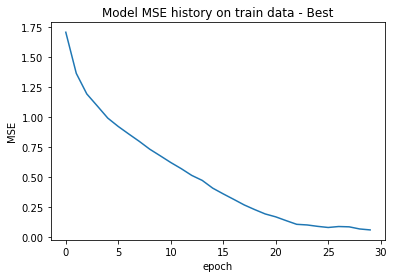

313/313 [==============================] - 1s 3ms/step - loss: 693.4169 - accuracy: 0.5721
Test loss: 693.4169311523438
Test accuracy: 0.5720999836921692


In [91]:
# Plotting
plt.plot(history_lenet_best.history['loss'])
plt.title('Model MSE history on train data - Best')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.show()

# Evaluate
score = lenet_best.evaluate(test_images, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [92]:
lenet_best_20epocs = tf.keras.models.Sequential()
lenet_best_20epocs.add(tf.keras.layers.Conv2D(6, (5, 5), strides=(1, 1), padding='same', activation='relu'))
lenet_best_20epocs.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
lenet_best_20epocs.add(tf.keras.layers.Conv2D(16, (5, 5), strides=(1, 1), padding='same', activation='relu'))
lenet_best_20epocs.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
lenet_best_20epocs.add(tf.keras.layers.Conv2D(120, (5, 5), strides=(1, 1), padding='same', activation='relu'))

lenet_best_20epocs.add(tf.keras.layers.Flatten())
lenet_best_20epocs.add(tf.keras.layers.Dense(84))
lenet_best_20epocs.add(tf.keras.layers.Activation('relu'))
lenet_best_20epocs.add(tf.keras.layers.Dense(10))
lenet_best_20epocs.add(tf.keras.layers.Activation('softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
lenet_best_20epocs.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
lenet_best_20epocs.build(input_shape=(1,32,32,3))
lenet_best_20epocs.summary()

# Train the model.
history_lenet_best_20epocs = lenet_best_20epocs.fit(
    train_images,
    train_labels, 
    batch_size=256,
    epochs=25)


Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_220 (Conv2D)         (1, 32, 32, 6)            456       
                                                                 
 max_pooling2d_120 (MaxPooli  (1, 16, 16, 6)           0         
 ng2D)                                                           
                                                                 
 conv2d_221 (Conv2D)         (1, 16, 16, 16)           2416      
                                                                 
 max_pooling2d_121 (MaxPooli  (1, 8, 8, 16)            0         
 ng2D)                                                           
                                                                 
 conv2d_222 (Conv2D)         (1, 8, 8, 120)            48120     
                                                                 
 flatten_37 (Flatten)        (1, 7680)               

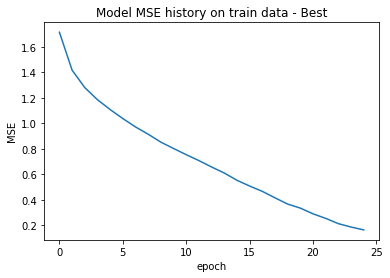

313/313 [==============================] - 1s 3ms/step - loss: 550.1443 - accuracy: 0.5200
Test loss: 550.1443481445312
Test accuracy: 0.5199999809265137


In [93]:
# Plotting
plt.plot(history_lenet_best_20epocs.history['loss'])
plt.title('Model MSE history on train data - Best')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.show()

# Evaluate
score = lenet_best_20epocs.evaluate(test_images, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [94]:
FFNW = tf.keras.models.Sequential()
FFNW.add(tf.keras.layers.Flatten())
FFNW.add(tf.keras.layers.Dense(6))
FFNW.add(tf.keras.layers.Activation('relu'))
FFNW.add(tf.keras.layers.Dense(16))
FFNW.add(tf.keras.layers.Activation('relu'))
FFNW.add(tf.keras.layers.Dense(120))
FFNW.add(tf.keras.layers.Activation('relu'))
FFNW.add(tf.keras.layers.Dense(84))
FFNW.add(tf.keras.layers.Activation('relu'))
FFNW.add(tf.keras.layers.Dense(10))
FFNW.add(tf.keras.layers.Activation('softmax'))


opt = keras.optimizers.Adam(learning_rate=0.001)
FFNW.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
FFNW.build(input_shape=(1,32,32,3))
FFNW.summary()

# Train the model.
history_FFNW = FFNW.fit(
    train_images,
    train_labels, 
    batch_size=256,
    epochs=25)



Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_38 (Flatten)        (1, 3072)                 0         
                                                                 
 dense_79 (Dense)            (1, 6)                    18438     
                                                                 
 activation_79 (Activation)  (1, 6)                    0         
                                                                 
 dense_80 (Dense)            (1, 16)                   112       
                                                                 
 activation_80 (Activation)  (1, 16)                   0         
                                                                 
 dense_81 (Dense)            (1, 120)                  2040      
                                                                 
 activation_81 (Activation)  (1, 120)                

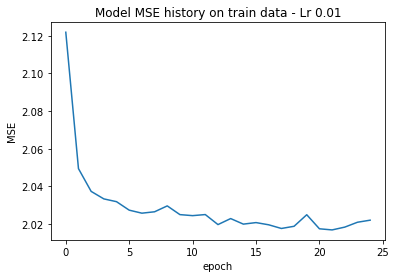

313/313 [==============================] - 1s 2ms/step - loss: 169.7793 - accuracy: 0.1584
Test loss: 169.77932739257812
Test accuracy: 0.15839999914169312


In [95]:
# Plotting
plt.plot(history_FFNW.history['loss'])
plt.title('Model MSE history on train data - Lr 0.01')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.show()

# Evaluate
score = FFNW.evaluate(test_images, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Question 3

In this question, it is asked to calculate an operation of a convolutional kernel f on an input matrix X.

First question, it is asked to calculate dimensions of the input and the kernal. The input X is 6x6x1 matrix and kernel f is 3x3 filter. The number of hyperparameters can be calculated like this:

\\
input is 6x6x1. kernel is 3x3. There is 1 filter. Number of hyperparameters is:
$ [(3\times3)\times1+1]\times1=10$

\\
In the second part, it is asked to calculate output of activation map. The below code calculates the output.

\\
In the third part, it is asked to apply a max pool on the output. It is not stated the size of maxpool. I assumed it is 2x2. The result of the output is given in below code.

In [19]:
xMatrix = np.array([[7, 5, 0, 0, 3, 2],[6, 4, 5, 1, 4, 8], [9, 0, 2, 2, 5, 4], [6, 3, 4, 7, 9, 8], [5, 7, 5, 6, 9, 0], [7, 9, 0, 8, 2, 3]])
fMatrix = np.array([[1, 0, -1], [2, 0, -2], [1, 0 ,-1]])
output = np.zeros(16).reshape(4,4)

for j in range(4):
  for i in range(4):
    output[i,j] = np.sum(xMatrix[(0+i):(3+i),(0+j):(3+j)]*fMatrix)

output_maxlayer = np.zeros(9).reshape(3,3)
for j in range(3):
  for i in range(3):
    output_maxlayer[i,j] = np.max(output[(0+i):(2+i),(0+j):(2+j)])

print('Output of activation map:')
print(output)
print('Output of max-pooling:')
print(output_maxlayer)

Output of activation map:
[[ 16.   9.  -4. -18.]
 [ 17.  -5. -10. -12.]
 [ 11.  -9. -17.   2.]
 [  9.  -1. -15.  16.]]
Output of max-pooling:
[[17.  9. -4.]
 [17. -5.  2.]
 [11. -1. 16.]]
